In [4]:
#Se importan las librerias necesarias para el manejo y visualizacion de la actividad
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [5]:
#Se carga la base de datos desde el CSV usando la libreria pandas
dataDF = pd.read_csv("Demanda2.csv")

In [6]:
#Se imprime las primeras 5 filas para visualizar la tabla
dataDF.head(5)

,Fecha,Demanda_real,Ventas,Moldeo,Visual,Casting,Inventario PT,Capacidad,Pronostico_1,Pronostico_2,...,Pronostico_4,Pronostico_5,Pronostico_6,Pronostico_7,Pronostico_8,Pronostico_9,Pronostico_10,Pronostico_11,Pronostico_12,Promedio_Pronostico
0,1/3/2022,19980,21230,10007,15500,57494.0,12770.0,"11,000",8080.0,20020.0,...,19835,17060,19830,20610,19985,19035,18385.0,18375.0,18650,219780.0
1,1/10/2022,20150,20070,10318,15600,61468.0,5350.0,"11,000",8665.0,19865.0,...,20145,17305,20625,20215,18680,18430,18240.0,15030.0,19550,216205.0
2,1/17/2022,20150,14200,10499,13950,58500.0,7470.0,"11,000",6050.0,19680.0,...,17305,20625,20215,18680,18430,18240,15030.0,19550.0,17095,211045.0
3,1/24/2022,23220,21530,10626,15750,58365.0,7580.0,"11,000",9735.0,19665.0,...,19330,19555,19275,19080,19130,16085,20315.0,18945.0,10950,207370.0
4,1/31/2022,20840,16909,12390,14750,49900.0,1190.0,13000,8355.0,15340.0,...,19560,19220,19080,19130,16085,20315,18995.0,10900.0,19670,205980.0


In [7]:
#Se revisa el tamaño de la base de datos
dataDF.shape

(56, 21)

In [8]:
#Se busca si existen datos nulos, para realizar la limpieza de los datos
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha                56 non-null     object 
 1   Demanda_real         56 non-null     int64  
 2   Ventas               56 non-null     int64  
 3   Moldeo               56 non-null     int64  
 4   Visual               56 non-null     int64  
 5   Casting              53 non-null     float64
 6   Inventario PT        53 non-null     float64
 7   Capacidad            56 non-null     object 
 8   Pronostico_1         51 non-null     float64
 9   Pronostico_2         54 non-null     float64
 10  Pronostico_3         56 non-null     int64  
 11  Pronostico_4         56 non-null     int64  
 12  Pronostico_5         56 non-null     int64  
 13  Pronostico_6         56 non-null     int64  
 14  Pronostico_7         56 non-null     int64  
 15  Pronostico_8         56 non-null     int64

In [9]:
#Efectivamente se observa a que variables pertencen los datos nulos
dataDF.isnull().sum()

Fecha                  0
Demanda_real           0
Ventas                 0
Moldeo                 0
Visual                 0
Casting                3
Inventario PT          3
Capacidad              0
Pronostico_1           5
Pronostico_2           2
Pronostico_3           0
Pronostico_4           0
Pronostico_5           0
Pronostico_6           0
Pronostico_7           0
Pronostico_8           0
Pronostico_9           0
Pronostico_10          4
Pronostico_11          1
Pronostico_12          0
Promedio_Pronostico    9
dtype: int64

In [10]:
#Eliminacion de los datos Nulos y llenado
dataDF = dataDF.fillna("Null")

In [11]:
dataDF = dataDF[dataDF['Demanda_real'] != 'Null']
dataDF = dataDF[dataDF['Promedio_Pronostico'] != 'Null']
dataDF = dataDF[dataDF['Inventario PT'] != 'Null']
dataDF = dataDF[dataDF['Ventas'] != 'Null']

In [12]:
dataDF.head(5)

,Fecha,Demanda_real,Ventas,Moldeo,Visual,Casting,Inventario PT,Capacidad,Pronostico_1,Pronostico_2,...,Pronostico_4,Pronostico_5,Pronostico_6,Pronostico_7,Pronostico_8,Pronostico_9,Pronostico_10,Pronostico_11,Pronostico_12,Promedio_Pronostico
0,1/3/2022,19980,21230,10007,15500,57494.0,12770.0,"11,000",8080.0,20020.0,...,19835,17060,19830,20610,19985,19035,18385.0,18375.0,18650,219780.0
1,1/10/2022,20150,20070,10318,15600,61468.0,5350.0,"11,000",8665.0,19865.0,...,20145,17305,20625,20215,18680,18430,18240.0,15030.0,19550,216205.0
2,1/17/2022,20150,14200,10499,13950,58500.0,7470.0,"11,000",6050.0,19680.0,...,17305,20625,20215,18680,18430,18240,15030.0,19550.0,17095,211045.0
3,1/24/2022,23220,21530,10626,15750,58365.0,7580.0,"11,000",9735.0,19665.0,...,19330,19555,19275,19080,19130,16085,20315.0,18945.0,10950,207370.0
4,1/31/2022,20840,16909,12390,14750,49900.0,1190.0,13000,8355.0,15340.0,...,19560,19220,19080,19130,16085,20315,18995.0,10900.0,19670,205980.0


In [13]:
#Nuevo tamaño de base de datos
dataDF.shape

(45, 21)

<Axes: xlabel='Demanda_real', ylabel='Count'>

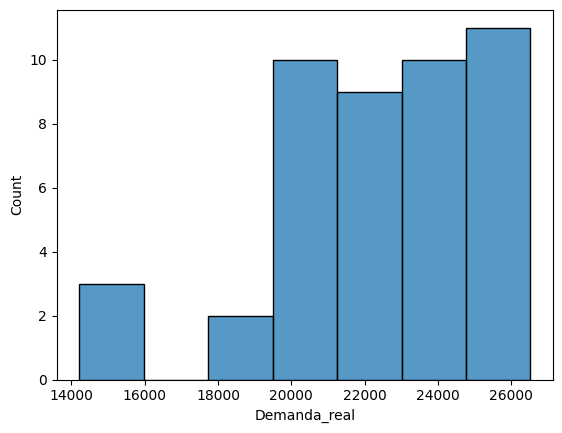

In [14]:
#Histograma para la normalidad de los datos
sns.histplot(dataDF["Demanda_real"])

In [15]:
#Algoritmo de Regresion lineal
X = dataDF[['Promedio_Pronostico', 'Ventas', 'Inventario PT', 'Pronostico_1', 'Pronostico_2', 'Pronostico_3', 'Casting', 'Visual']]
y = dataDF['Demanda_real']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

# check the model's coefficients
print(model.coef_)

[-0.0224205   0.22789033 -0.1726134   0.21553825  0.14343114 -0.18258798
 -0.00955119  0.07790882]


In [16]:
#Predicciones
print(y_pred)

[19631.8043012  20886.07918468 18481.7577162  22032.95978293
 20464.28557109 19769.64057502 19587.63915118 19821.18658152
 19529.99314753 17790.89754946 22263.63212731 20155.30610415
 20355.85146998 20996.03282872 22233.20792036 23606.43946876
 22676.14991329 23202.29017413 22037.64184657 24553.78881753
 23915.84671375 23347.82919948 22087.65216471 25351.76356659
 23882.7830881  24026.60116067 22542.35512067 22185.08804395
 23177.74287595 25264.4336594  23463.90070098 23832.00352761
 25134.11244314 25371.04968896 24899.14102655 24586.80055487
 23944.10777069 25840.12469387 23556.95522818 16029.92851831
 15367.09510279 22569.34546245 25237.57808886 25239.91941191
 22994.25795596]


In [17]:
#Promedio necesario de resultado de prediccion
promedio = np.mean(y_pred)
print(promedio)

22309.444444444445


In [18]:
#Asertividad de la predicción utilizando el coeficiente de determinación R^2
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print("R^2:", r2)

R^2: 0.737451957336863
